In [0]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from keras.models import Sequential # https://keras.io/models/model/
from keras.layers import Dense,Activation
from keras.utils import np_utils
from keras.layers import Input, Dropout
from keras.models import Model

In [0]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets list -s emnist

ref                                                          title                          size  lastUpdated          downloadCount  
-----------------------------------------------------------  ----------------------------  -----  -------------------  -------------  
crawford/emnist                                              EMNIST (Extended MNIST)         1GB  2017-12-20 17:42:58           7828  
tomasramos21/emnist-jpeg                                     EMNIST - JPEG                  37MB  2019-01-28 16:01:20             43  
edddddd/emnist                                               EMNIST                        282MB  2019-03-15 23:20:10              4  
skhadirahmed/emnistletters                                   EMNIST-Letters                 32MB  2019-02-17 06:18:14             23  
fuckya/emnist                                                emnist                         32MB  2018-10-23 12:51:37             18  
thousandping/emnistbyclassmat                          

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d crawford/emnist -p/content

 99% 1.24G/1.24G [00:29<00:00, 62.3MB/s]
100% 1.24G/1.24G [00:30<00:00, 44.2MB/s]


In [0]:
!unzip \*.zip

Archive:  emnist.zip
  inflating: emnist-digits-mapping.txt  
  inflating: emnist-balanced-mapping.txt  
  inflating: emnist-letters-test.csv  
  inflating: emnist-bymerge-test.csv  
  inflating: emnist-letters-train.csv  
  inflating: emnist-mnist-train.csv  
  inflating: emnist-letters-mapping.txt  
  inflating: emnist-byclass-test.csv  
  inflating: emnist-byclass-mapping.txt  
  inflating: emnist-bymerge-mapping.txt  
  inflating: emnist-digits-train.csv  
  inflating: emnist-bymerge-train.csv  
  inflating: emnist_source_files.zip  
  inflating: emnist-mnist-test.csv   
  inflating: emnist-byclass-train.csv  
  inflating: emnist-mnist-mapping.txt  
  inflating: emnist-balanced-train.csv  
  inflating: emnist-balanced-test.csv  
  inflating: emnist-digits-test.csv  


In [0]:
df_train = pd.read_csv('emnist-byclass-train.csv')
df_test  = pd.read_csv('emnist-byclass-test.csv')

In [0]:
df_train.shape,df_test.shape

((697931, 785), (116322, 785))

In [0]:
df_train.any().isnull().sum(),df_test.isnull().any().sum()

(0, 0)

In [0]:
df_train.head()

,35,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.436,0.437,0.438,0.439,0.440,0.441,0.442,0.443,0.444,0.445,0.446,0.447,0.448,0.449,0.450,0.451,0.452,0.453,0.454,0.455,0.456,0.457,0.458,0.459,0.460,0.461,0.462,0.463,0.464,0.465,0.466,0.467,0.468,0.469,0.470,0.471,0.472,0.473,0.474,0.475
0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_test.head()

,18,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661
0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
x_train_9k   = df_train.iloc[0:9000,1:785]/255
x_train_27k  = df_train.iloc[0:27000,1:785]/255
x_train_80k  = df_train.iloc[0:80000,1:785]/255
x_train_240k = df_train.iloc[0:240000,1:785]/255
x_train_697k = df_train.iloc[0:,1:785]/255

In [0]:
y_train_9k   = df_train.iloc[0:9000,0]/255
y_train_27k  = df_train.iloc[0:27000,0]/255
y_train_80k  = df_train.iloc[0:80000,0]/255
y_train_240k = df_train.iloc[0:240000,0]/255
y_train_697k = df_train.iloc[:,0]/255

In [0]:
x_test = df_test.iloc[:,1:785]/255
y_test = df_test.iloc[:,0]/255

x_test.shape,y_test.shape

((116322, 784), (116322,))

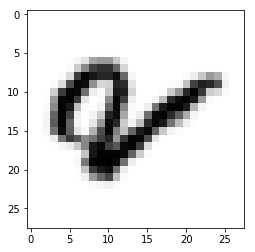

In [0]:
plt.imshow(x_train_9k.values[6,:].reshape([28, 28]), cmap='Greys')  # cmap = 'Greys_r'

In [0]:
#df_train[df_train.iloc[:,0]==3]

In [0]:
num_classes  = 47

y_train_9k   = np_utils.to_categorical(y_train_9k,  num_classes)
y_train_27k  = np_utils.to_categorical(y_train_27k, num_classes)
y_train_80k  = np_utils.to_categorical(y_train_80k, num_classes)
y_train_240k = np_utils.to_categorical(y_train_240k,num_classes)
y_train_697k = np_utils.to_categorical(y_train_697k,num_classes)

y_test = np_utils.to_categorical(y_test,num_classes)

y_train_9k.shape,y_train_27k.shape,y_train_80k.shape,y_train_240k.shape,y_train_697k.shape

((9000, 47), (27000, 47), (80000, 47), (240000, 47), (697931, 47))

In [0]:
x_train_9k   = x_train_9k.astype('float32')
x_train_27k  = x_train_27k.astype('float32')
x_train_80k  = x_train_80k.astype('float32')
x_train_240k = x_train_240k.astype('float32')
x_train_697k = x_train_697k.astype('float32')

x_test = x_test.astype('float32')

x_train_9k.shape,x_train_27k.shape,x_train_80k.shape,x_train_240k.shape,x_train_697k.shape

((9000, 784), (27000, 784), (80000, 784), (240000, 784), (697931, 784))

In [0]:
inp = Input(shape=(784,))
hidden_1 = Dense(1024, activation='relu')(inp)
dropout_1 = Dropout(0.2)(hidden_1)
out = Dense(num_classes, activation='softmax')(hidden_1) 
model_9k   = Model(inputs=inp, outputs=out)
model_27k  = Model(inputs=inp, outputs=out)
model_80k  = Model(inputs=inp, outputs=out)
model_240k = Model(inputs=inp, outputs=out)
model_697k = Model(inputs=inp, outputs=out)

W0825 15:33:14.919249 140445077690240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 15:33:14.989220 140445077690240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 15:33:15.023839 140445077690240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0825 15:33:15.047031 140445077690240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0825 15:33:15.053396 

In [0]:
model_9k.compile(loss='categorical_crossentropy', 
              optimizer='adam',metrics=['accuracy']) 

model_9k.fit(x_train_9k, y_train_9k, 
          batch_size=512, epochs=10,
          verbose=1, validation_split=0.1)

W0825 15:33:37.038519 140445077690240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0825 15:33:37.065924 140445077690240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0825 15:33:37.195023 140445077690240 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8100 samples, validate on 900 samples
Epoch 1/10
8100/8100 [==============================] - 4s 531us/step - loss: 0.3923 - acc: 0.9368 - val_loss: 1.7956e-05 - val_acc: 1.0000
Epoch 2/10
8100/8100 [==============================] - 0s 20us/step - loss: 1.8387e-05 - acc: 1.0000 - val_loss: 1.3496e-06 - val_acc: 1.0000
Epoch 3/10
8100/8100 [==============================] - 0s 19us/step - loss: 3.3231e-06 - acc: 1.0000 - val_loss: 7.8328e-07 - val_acc: 1.0000
Epoch 4/10
8100/8100 [==============================] - 0s 19us/step - loss: 2.4989e-06 - acc: 1.0000 - val_loss: 6.9876e-07 - val_acc: 1.0000
Epoch 5/10
8100/8100 [==============================] - 0s 18us/step - loss: 2.3436e-06 - acc: 1.0000 - val_loss: 6.8147e-07 - val_acc: 1.0000
Epoch 6/10
8100/8100 [==============================] - 0s 17us/step - loss: 2.3191e-06 - acc: 1.0000 - val_loss: 6.7690e-07 - val_acc: 1.0000
Epoch 7/10
8100/8100 [==============================] - 0s 17us/step - loss: 2.3075e-06 - acc: 1.0

In [0]:
result_9k = model_9k.evaluate(x_test, y_test, verbose=1)

116322/116322 [==============================] - 4s 34us/step


In [0]:
result_9k[0],result_9k[1]

(2.7327036298487444e-06, 1.0)

In [0]:
model_27k.compile(loss='categorical_crossentropy', 
              optimizer='adam', #Adam optimizer
              metrics=['accuracy']) 

model_27k.fit(x_train_27k, y_train_27k, 
          batch_size=512, epochs=10,
          verbose=1, validation_split=0.1)

Train on 24300 samples, validate on 2700 samples
Epoch 1/10
24300/24300 [==============================] - 1s 34us/step - loss: 5.9404e-07 - acc: 1.0000 - val_loss: 2.7227e-07 - val_acc: 1.0000
Epoch 2/10
24300/24300 [==============================] - 1s 28us/step - loss: 1.8303e-07 - acc: 1.0000 - val_loss: 1.9623e-07 - val_acc: 1.0000
Epoch 3/10
24300/24300 [==============================] - 1s 27us/step - loss: 1.5343e-07 - acc: 1.0000 - val_loss: 1.6760e-07 - val_acc: 1.0000
Epoch 4/10
24300/24300 [==============================] - 1s 25us/step - loss: 1.4164e-07 - acc: 1.0000 - val_loss: 1.5186e-07 - val_acc: 1.0000
Epoch 5/10
24300/24300 [==============================] - 1s 22us/step - loss: 1.3490e-07 - acc: 1.0000 - val_loss: 1.4407e-07 - val_acc: 1.0000
Epoch 6/10
24300/24300 [==============================] - 1s 23us/step - loss: 1.3106e-07 - acc: 1.0000 - val_loss: 1.3886e-07 - val_acc: 1.0000
Epoch 7/10
24300/24300 [==============================] - 1s 22us/step - loss: 1.

In [0]:
result_27k = model_27k.evaluate(x_test, y_test, verbose=1)

116322/116322 [==============================] - 4s 35us/step


In [0]:
result_27k[0],result_27k[1]

(1.5612358448062746e-07, 1.0)

In [0]:
model_80k.compile(loss='categorical_crossentropy', 
              optimizer='adam', #Adam optimizer
              metrics=['accuracy']) 

model_80k.fit(x_train_80k, y_train_80k, 
          batch_size=512, epochs=10,
          verbose=1, validation_split=0.1)

Train on 72000 samples, validate on 8000 samples
Epoch 1/10
72000/72000 [==============================] - 2s 33us/step - loss: 1.3105e-07 - acc: 1.0000 - val_loss: 1.2232e-07 - val_acc: 1.0000
Epoch 2/10
72000/72000 [==============================] - 2s 28us/step - loss: 1.2624e-07 - acc: 1.0000 - val_loss: 1.2096e-07 - val_acc: 1.0000
Epoch 3/10
72000/72000 [==============================] - 2s 29us/step - loss: 1.2377e-07 - acc: 1.0000 - val_loss: 1.2042e-07 - val_acc: 1.0000
Epoch 4/10
72000/72000 [==============================] - 2s 35us/step - loss: 1.2223e-07 - acc: 1.0000 - val_loss: 1.1986e-07 - val_acc: 1.0000
Epoch 5/10
72000/72000 [==============================] - 2s 33us/step - loss: 1.2149e-07 - acc: 1.0000 - val_loss: 1.1969e-07 - val_acc: 1.0000
Epoch 6/10
72000/72000 [==============================] - 2s 32us/step - loss: 1.2101e-07 - acc: 1.0000 - val_loss: 1.1957e-07 - val_acc: 1.0000
Epoch 7/10
72000/72000 [==============================] - 3s 35us/step - loss: 1.

In [0]:
result_80k = model_80k.evaluate(x_test, y_test, verbose=1)

116322/116322 [==============================] - 4s 33us/step


In [0]:
result_80k[0],result_80k[1]

(1.2298591109181862e-07, 1.0)

In [0]:
model_240k.compile(loss='categorical_crossentropy', 
              optimizer='adam', #Adam optimizer
              metrics=['accuracy']) 

model_240k.fit(x_train_240k, y_train_240k, 
          batch_size=512, epochs=10,
          verbose=1, validation_split=0.1)

Train on 216000 samples, validate on 24000 samples
Epoch 1/10
216000/216000 [==============================] - 8s 38us/step - loss: 1.2094e-07 - acc: 1.0000 - val_loss: 1.2053e-07 - val_acc: 1.0000
Epoch 2/10
216000/216000 [==============================] - 8s 35us/step - loss: 1.2045e-07 - acc: 1.0000 - val_loss: 1.2016e-07 - val_acc: 1.0000
Epoch 3/10
216000/216000 [==============================] - 8s 37us/step - loss: 1.2011e-07 - acc: 1.0000 - val_loss: 1.1994e-07 - val_acc: 1.0000
Epoch 4/10
216000/216000 [==============================] - 8s 37us/step - loss: 1.1990e-07 - acc: 1.0000 - val_loss: 1.1979e-07 - val_acc: 1.0000
Epoch 5/10
216000/216000 [==============================] - 8s 37us/step - loss: 1.1975e-07 - acc: 1.0000 - val_loss: 1.1969e-07 - val_acc: 1.0000
Epoch 6/10
216000/216000 [==============================] - 8s 38us/step - loss: 1.1966e-07 - acc: 1.0000 - val_loss: 1.1961e-07 - val_acc: 1.0000
Epoch 7/10
216000/216000 [==============================] - 8s 36us

In [0]:
result_240k = model_240k.evaluate(x_test, y_test, verbose=1)

116322/116322 [==============================] - 4s 35us/step


In [0]:
result_240k[0],result_240k[1]

(1.197924313851686e-07, 1.0)

In [0]:
model_697k.compile(loss='categorical_crossentropy', 
              optimizer='adam', #Adam optimizer
              metrics=['accuracy']) 

model_697k.fit(x_train_697k, y_train_697k, 
          batch_size=512, epochs=10,
          verbose=1, validation_split=0.1)

Train on 628137 samples, validate on 69794 samples
Epoch 1/10
628137/628137 [==============================] - 19s 31us/step - loss: 1.1962e-07 - acc: 1.0000 - val_loss: 1.1957e-07 - val_acc: 1.0000
Epoch 2/10
628137/628137 [==============================] - 21s 34us/step - loss: 1.1951e-07 - acc: 1.0000 - val_loss: 1.1948e-07 - val_acc: 1.0000
Epoch 3/10
628137/628137 [==============================] - 21s 33us/step - loss: 1.1943e-07 - acc: 1.0000 - val_loss: 1.1943e-07 - val_acc: 1.0000
Epoch 4/10
628137/628137 [==============================] - 21s 33us/step - loss: 1.1939e-07 - acc: 1.0000 - val_loss: 1.1939e-07 - val_acc: 1.0000
Epoch 5/10
628137/628137 [==============================] - 22s 35us/step - loss: 1.1936e-07 - acc: 1.0000 - val_loss: 1.1937e-07 - val_acc: 1.0000
Epoch 6/10
628137/628137 [==============================] - 22s 34us/step - loss: 1.1934e-07 - acc: 1.0000 - val_loss: 1.1935e-07 - val_acc: 1.0000
Epoch 7/10
628137/628137 [==============================] - 2

In [0]:
result_697k = model_697k.evaluate(x_test, y_test, verbose=1)

116322/116322 [==============================] - 4s 37us/step


In [0]:
result_697k[0],result_697k[1]

(1.1931588538017466e-07, 1.0)

-------------------------------------------------------------------------------------------------------------------------------

In [0]:
result = pd.DataFrame({'Dataset_Size':['9k','27k','80k','240k','697k'],'Loss':[result_9k[0],result_27k[0],result_80k[0],result_240k[0],result_697k[0]]})

In [0]:
result

,Dataset_Size,Loss
0,9k,2.732704e-06
1,27k,1.561236e-07
2,80k,1.229859e-07
3,240k,1.197924e-07
4,697k,1.193159e-07


Text(0.5, 1.0, 'Dataset_Size V/s Loss')

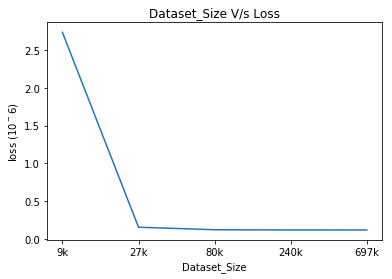

In [0]:
plt.plot(['9k','27k','80k','240k','697k'],[result_9k[0]*1000000,result_27k[0]*1000000,
                                           result_80k[0]*1000000,result_240k[0]*1000000,
                                           result_697k[0]*1000000])
plt.xlabel('Dataset_Size')
plt.ylabel('loss ($10^-6$)')
plt.title('Dataset_Size V/s Loss')